In [10]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#importing the data
cust = pd.read_csv(r'E:\data science assignment\3. Pandas Case Study 1 - Retail Case Study\customer.csv')
trans = pd.read_csv(r'E:\data science assignment\3. Pandas Case Study 1 - Retail Case Study\transactions.csv')
prod_cat = pd.read_csv(r'E:\data science assignment\3. Pandas Case Study 1 - Retail Case Study\prod_cat_info.csv')
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [3]:
trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [4]:
prod_cat.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [18]:
fin = pd.merge(cust, trans, left_on = 'customer_Id', right_on = 'cust_id',how = 'inner',indicator = True)
cst_final = pd.merge(fin,prod_cat, left_on = ['prod_cat_code','prod_subcat_code'], right_on = ['prod_cat_code','prod_sub_cat_code'],how = 'inner')
cst_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,both,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,both,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,both,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,both,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,both,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,both,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,both,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,both,Books,10,Non-Fiction


In [17]:
#2.a
cst_final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

In [25]:
cst_final['tran_date'] = pd.to_datetime(cst_final['tran_date'])
cst_final['DOB'] = pd.to_datetime(cst_final['DOB'])
cst_final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
_merge                     category
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [7]:
#2.b
cst_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,both,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,both,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,both,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,both,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,both,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,both,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,both,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,both,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,both,Books,7,Fiction


In [8]:
#2.b.
cst_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,both,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,both,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,both,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,both,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,both,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,both,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,both,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,both,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,both,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,both,Books,10,Non-Fiction


In [9]:
cst_final = cst_final.astype({'customer_Id':'str','city_code':'str','transaction_id':'str','cust_id':'str','prod_subcat_code':'str','prod_cat_code':'str','prod_sub_cat_code':'str'})

In [10]:
#2.c.
cst_final.describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [11]:
#2.d.
cst_final['Gender'].value_counts()

M    11811
F    11233
Name: Gender, dtype: int64

In [12]:
cst_final['city_code'].value_counts()

4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
nan        8
Name: city_code, dtype: int64

In [13]:
cst_final['prod_subcat_code'].value_counts()

4     4002
3     3067
10    2993
1     2950
11    2058
12    2029
7     1043
2     1007
6      989
9      985
8      972
5      958
Name: prod_subcat_code, dtype: int64

In [14]:
cst_final['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [15]:
cst_final['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [16]:
cst_final['prod_subcat'].value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

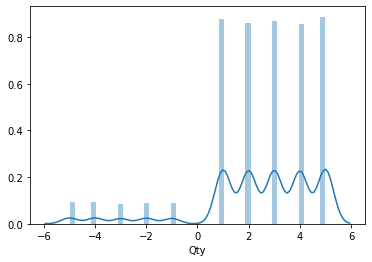

In [17]:
#3.
sns.distplot(cst_final.Qty)
plt.show

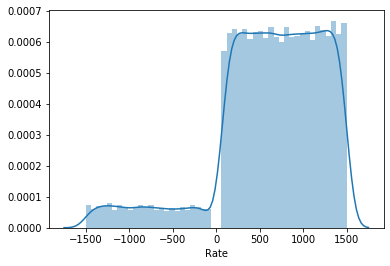

In [18]:
sns.distplot(cst_final.Rate)

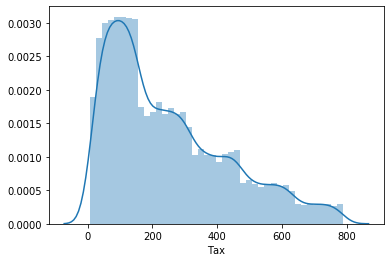

In [19]:
sns.distplot(cst_final.Tax)

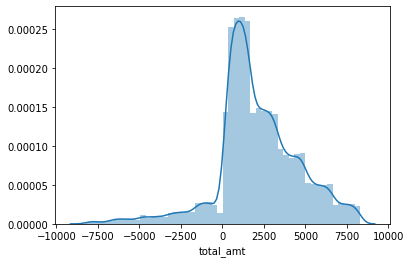

In [19]:
sns.distplot(cst_final.total_amt)

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


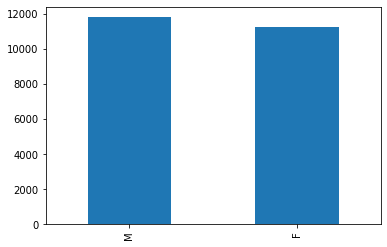

In [20]:
cst_final['Gender'].value_counts().plot('bar')

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


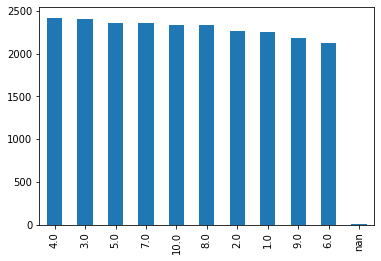

In [21]:
cst_final['city_code'].value_counts().plot('bar')

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


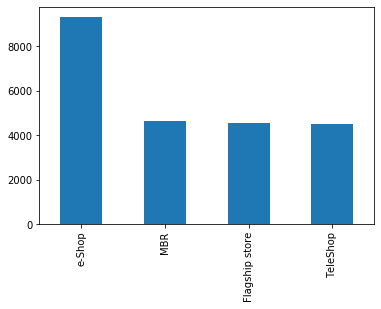

In [22]:
cst_final['Store_type'].value_counts().plot('bar')

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


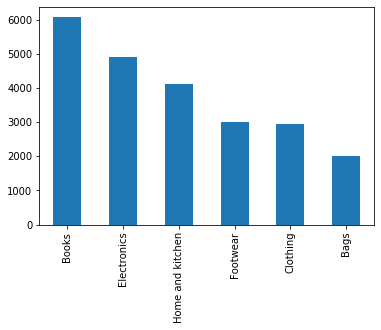

In [23]:
cst_final['prod_cat'].value_counts().plot('bar')

C:\Users\Vikas raj purohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


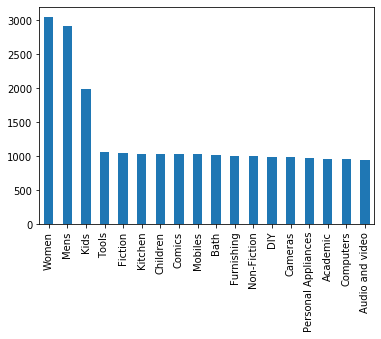

In [24]:
cst_final['prod_subcat'].value_counts().plot('bar')

In [50]:
#4.a.
print('The transaction data is available from ',min(cst_final.tran_date), 'to',max(cst_final.tran_date))

The transaction data is available from  2011-01-02 00:00:00 to 2014-12-02 00:00:00


In [20]:

#4.b.
cst_final[cst_final.total_amt <0].total_amt.count()

2177

In [21]:
#5
cst_final.groupby(['prod_cat','Gender']).Gender.count()

prod_cat          Gender
Bags              F          994
                  M         1004
Books             F         2949
                  M         3116
Clothing          F         1439
                  M         1518
Electronics       F         2328
                  M         2570
Footwear          F         1529
                  M         1469
Home and kitchen  F         1994
                  M         2134
Name: Gender, dtype: int64

In [22]:
#6
cst_by_city = cst_final.groupby('city_code').customer_Id.count().reset_index()
cst_by_city['Percentage'] = (cst_by_city.customer_Id/sum(cst_by_city.customer_Id))*100
cst_by_city.sort_values('customer_Id',ascending = False).head(1)

,city_code,customer_Id,Percentage
4,4.0,2422,10.506225


In [23]:
#7.
cst_final.groupby('Store_type')['Qty','total_amt'].sum().sort_values('total_amt',ascending = False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


In [24]:
#8.
cst_final[(cst_final.Store_type =='Flagship store') &((cst_final.prod_cat == 'Books') | ( cst_final.prod_cat == 'Electronics'))].total_amt.sum()

4703341.89

In [25]:
#9.
cst_final[(cst_final.Gender == 'M') & (cst_final.prod_cat == 'Electronics')].total_amt.sum()

5703109.425

In [38]:
#10.
pos_trn = cst_final[cst_final.total_amt>0]
cst_id = pos_trn.groupby('customer_Id').transaction_id.count().reset_index()
cst_id[cst_id.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


In [47]:
#11.a.
cst_25_35 = cst_final[((pd.DatetimeIndex(cst_final['tran_date']).year-pd.DatetimeIndex(cst_final['DOB']).year)>25) & ((pd.DatetimeIndex(cst_final['tran_date']).year-pd.DatetimeIndex(cst_final['DOB']).year)>35)]
cst_25_35[(cst_25_35.prod_cat == 'Books') | ( cst_25_35.prod_cat == 'Electronics')].total_amt.sum()


7450090.115

In [49]:
#11.b.
cst_25_35[(cst_25_35.tran_date > '2014/01/01') & (cst_25_35.tran_date < '2014/03/01')].total_amt.sum()

483822.04